#churn modeling

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df.shape

(10000, 14)

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [22]:
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Female        0
Gender_Male          0
dtype: int64

In [31]:
x=df.drop(["Surname","RowNumber","CustomerId"],axis=1)
y=df["Exited"]

In [34]:
df=pd.get_dummies(df,columns=["Gender","Geography"])

KeyError: "None of [Index(['Gender', 'Geography'], dtype='object')] are in the [columns]"

In [35]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [38]:
model_log=LogisticRegression()

In [39]:
model_log.fit(x_train,y_train)

LogisticRegression()

In [40]:
model_log.score(x_train,y_train)

0.794

In [41]:
model_log.score(x_test,y_test)

0.7863333333333333

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
model_dtc=DecisionTreeClassifier(max_depth=2)

In [44]:
model_dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [45]:
model_log.score(x_train,y_train)

0.794

In [46]:
model_log.score(x_test,y_test)

0.7863333333333333

In [47]:
# basic and most important libraries
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly

#classifiers
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.discriminant_analysis import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.svm import SVC

#model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
#data processing functions
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [49]:
df.sample(10).style.background_gradient(cmap='coolwarm')

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
4723,4724,15790658,Iqbal,621,42,8,68683.680000,1,1,1,74157.710000,0,False,False,True,False,True
3332,3333,15720508,Hsing,735,31,3,119558.350000,1,0,0,72927.680000,0,True,False,False,False,True
7171,7172,15744273,Waterhouse,637,30,6,122641.560000,2,1,0,65618.010000,0,False,True,False,False,True
3640,3641,15603665,Colombo,638,39,0,122501.280000,2,1,1,95007.800000,0,False,True,False,True,False
3308,3309,15733014,Nolan,813,62,10,64667.950000,2,0,1,140454.140000,0,True,False,False,True,False
81,82,15663706,Leonard,777,32,2,0.000000,1,1,0,136458.190000,1,True,False,False,True,False
1018,1019,15602010,Zikoranaudodimma,850,45,5,103909.860000,1,1,0,60083.110000,1,False,True,False,True,False
9985,9986,15586914,Nepean,659,36,6,123841.490000,2,1,0,96833.000000,0,True,False,False,False,True
2897,2898,15664150,Holland,528,29,9,170214.230000,2,1,0,49284.000000,0,False,True,False,True,False
9959,9960,15677783,Graham,764,38,4,113607.470000,1,1,0,91094.460000,0,False,False,True,False,True


In [51]:
df.describe().style.background_gradient(cmap='rainbow')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.500000,15690940.569400,650.528800,38.921800,5.012800,76485.889288,1.530200,0.705500,0.515100,100090.239881,0.203700
std,2886.895680,71936.186123,96.653299,10.487806,2.892174,62397.405202,0.581654,0.455840,0.499797,57510.492818,0.402769
min,1.000000,15565701.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2500.750000,15628528.250000,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,5000.500000,15690738.000000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,7500.250000,15753233.750000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000
max,10000.000000,15815690.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [52]:
categorical_columns=['RowNumber','CustomerId','CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard']

ValueError: Could not interpret input 'Loan_Status'

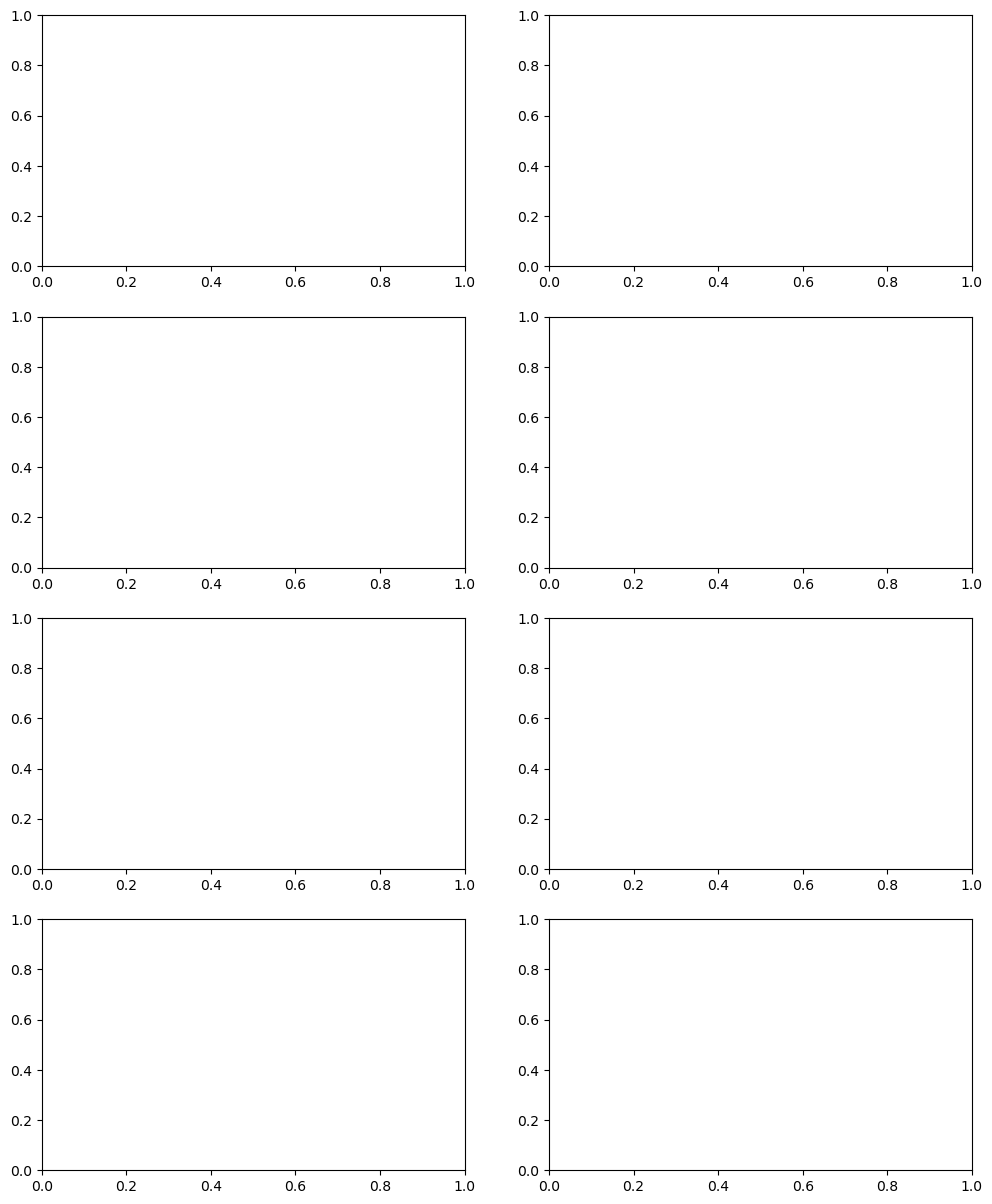

In [57]:
fig, axes = plt.subplots(4,2,figsize=(12,15))

for idx,cat_col in enumerate(categorical_columns):
    row, col = idx // 2, idx % 2
    sns.countplot(x=cat_col, data=df, hue='Loan_Status', ax=axes[row,col])
    axes[row,col].legend(fontsize='small')
    
plt.subplots_adjust(hspace=1)
plt.show()

In [ ]:
numerical_columns= ['ApplicantIncome','CoapplicantIncome','LoanAmount']

NameError: name 'numerical_columns' is not defined

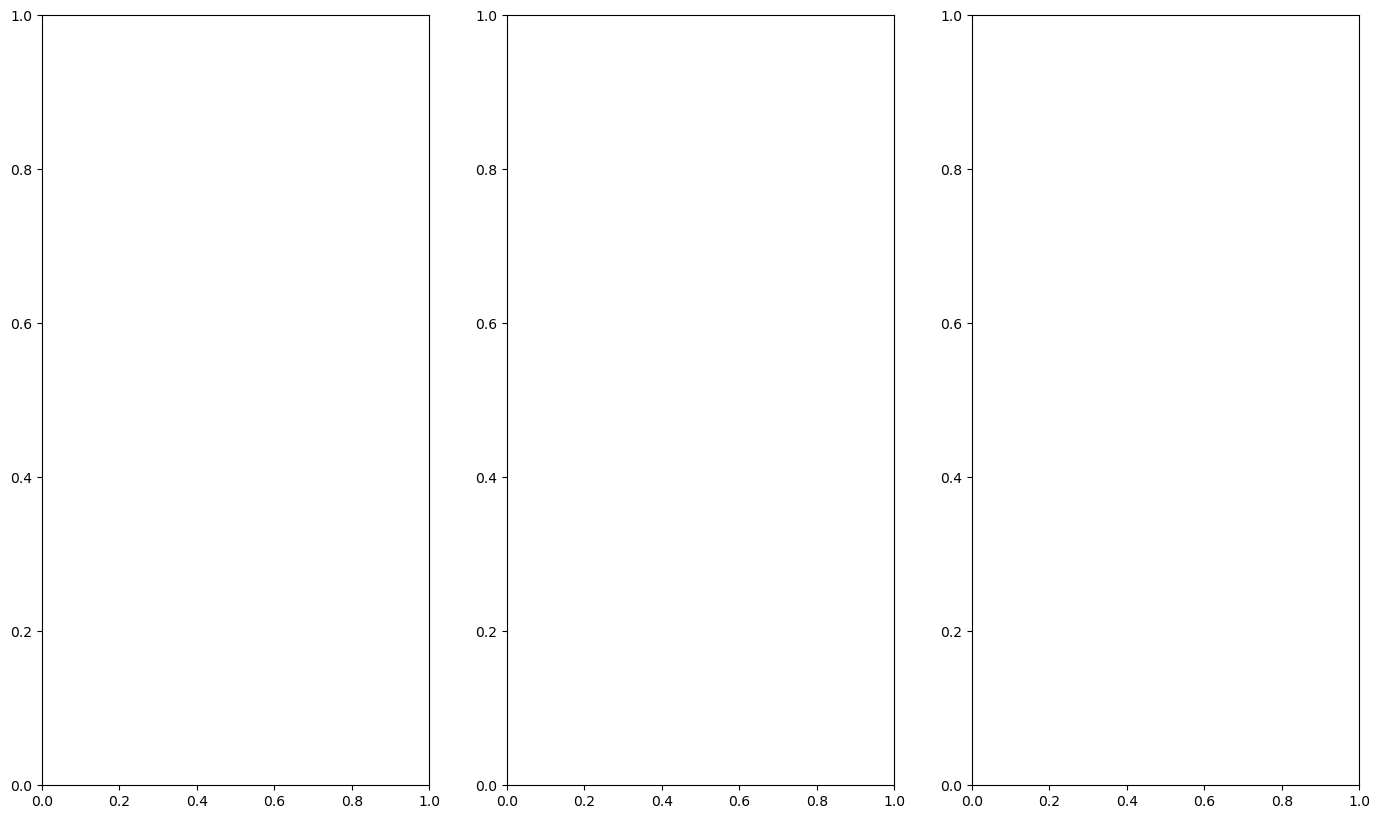

In [58]:
fig,axes = plt.subplots(1,3,figsize=(17,10))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=data,x='Loan_Status',ax=axes[idx])
print(data[numerical_columns].describe())
plt.subplots_adjust(hspace=1)